# RQ1: Baseline Model Evaluation

- Write down evaluation time
- Write down evaluation scores
- Generate graphs

## Training Time

Epoch 1: 3:41h

Epoch 2: 3:42h

Epoch 3: 3:42h

Epoch 4: 3:43h

Epoch 5: 3:43h

Epoch 6: 3:43h

Epoch 7: 3:43h

Epoch 8: 3:43h

Epoch 9: 3:43h

Epoch 10: 3:43h

Epoch 11: 3:43h

Epoch 12: 3:43h

## Mode Evaluation Time

Epoch 1 model: 2:31h

Epoch 2 model: 2:29h

Epoch 3 model: 2:28h

Epoch 4 model: 2:26h

Epoch 5 model: 2:24h

Epoch 6 model: 2:23h

Epoch 7 model: 2:23h

Epoch 8 model: 2:22h

Epoch 9 model: 2:21h

Epoch 10 model: 2:22h

Epoch 11 model: 2:21h

Epoch 12 model: 2:20h


In [1]:
import pickle
# Fill list and visualize
# string_ids is new
value_scores = {
    "attr_ids": {
        "t_score": [0.87, 0.96, 0.98, 0.95, 0.96, 0.97, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99],
        "v_score": [0.08, 0.11, 0.16, 0.24, 0.34, 0.38, 0.42, 0.44, 0.46, 0.47, 0.48, 0.49],
        "label": "Attribute Access"
    },
    "num_ids": {
        "t_score": [0.36, 0.44, 0.48, 0.55, 0.57, 0.62, 0.7, 0.69, 0.71, 0.72, 0.72, 0.73],
        "v_score": [0.46, 0.48, 0.5, 0.52, 0.54, 0.55, 0.58, 0.59, 0.6, 0.61, 0.62, 0.62],
        "label": "Numeric Constant"
    },
    "name_ids": {
        "t_score": [0.86, 0.87, 0.89, 0.89, 0.9, 0.9, 0.92, 0.92, 0.92, 0.93, 0.93, 0.93],
        "v_score": [0.2, 0.28, 0.35, 0.4, 0.48, 0.51, 0.55, 0.57, 0.58, 0.59, 0.6, 0.6],
        "label": "Variable Name/Module Name"
    },
    "param_ids": {
        "t_score": [0.8, 0.91, 0.9, 0.9, 0.9, 0.93, 0.92, 0.92, 0.93, 0.92, 0.92, 0.92],
        "v_score": [0.48, 0.5, 0.52, 0.54, 0.56, 0.55, 0.57, 0.58, 0.59, 0.59, 0.6, 0.6],
        "label": "Function Parameter Name"
    },
    "string_ids": {
        "t_score": [0.64, 0.7, 0.75, 0.73, 0.78, 0.83, 0.82, 0.84, 0.84, 0.85, 0.87, 0.87],
        "v_score": [0.02, 0.03, 0.05, 0.06, 0.09, 0.1, 0.12, 0.13, 0.14, 0.15, 0.16, 0.16],
        "label": "Strings"
    }
}
type_scores = {
    "call_ids": {
        "score": [0.22, 0.28, 0.3, 0.34, 0.38, 0.39, 0.42, 0.44, 0.45, 0.46, 0.47, 0.47],
        "label": "Function Call"
    },
    "assign_ids": {
        "score": [0.27, 0.36, 0.4, 0.42, 0.46, 0.49, 0.52, 0.53, 0.55, 0.55, 0.56, 0.57],
        "label": "Assignment"
    },
    "return_ids": {
        "score": [0.3, 0.4, 0.45, 0.48, 0.53, 0.56, 0.58, 0.6, 0.61, 0.62, 0.62, 0.63],
        "label": "Return"
    },
    "list_ids": {
        "score": [0.05, 0.08, 0.1, 0.13, 0.19, 0.2, 0.24, 0.27, 0.28, 0.3, 0.3, 0.31],
        "label": "List"
    },
    "dict_ids": {
        "score": [0.05, 0.07, 0.1, 0.12, 0.15, 0.16, 0.19, 0.19, 0.19, 0.21, 0.21, 0.21],
        "label": "Dictionary"
    },
    "raise_ids": {
        "score": [0.33, 0.62, 0.66, 0.68, 0.71, 0.75, 0.76, 0.78, 0.79, 0.8, 0.81, 0.81],
        "label": "Raise"
    }
}

with open("rq1/scores.pkl", "wb") as fout:
    pickle.dump({"value_scores": value_scores, "type_scores": type_scores}, fout)

In [23]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams

rcParams.update({'font.size': 14})

## Value Predictions
Value predictions actually consists of two predictions:
- Prediction of value node
- Prediction of type, the parent of value node
- For example: Predicting a string requires the prediction of the node type "Str" and then the actual string value prediction

attr_ids: 0.74
num_ids: 0.675
name_ids: 0.765
param_ids: 0.76
string_ids: 0.515


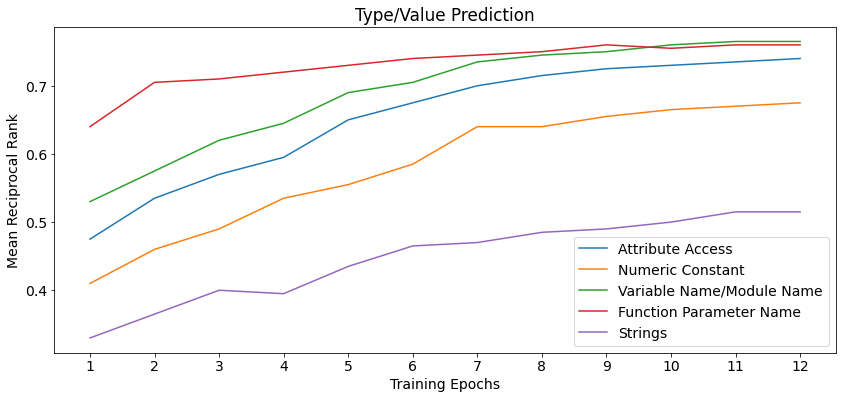

In [30]:
means = {
    "attr_ids": [],
    "num_ids": [],
    "name_ids": [],
    "param_ids": [],
    "string_ids": []
}
for key, value in value_scores.items():
    for i in range(len(value["t_score"])):
        means[key].append((value["t_score"][i] + value["v_score"][i])/2)
    print("{}: {}".format(key, means[key][-1]))
figure(figsize=(14,6))
plt.title("Type/Value Prediction")
plt.xlabel("Training Epochs")
plt.ylabel("Mean Reciprocal Rank")
plt.xticks(list(range(1, 13)))
for key in means:
    plt.plot(range(1, len(means[key]) + 1), means[key], label=value_scores[key]["label"])
plt.legend()
    

## Type Predictions
Type predictions only consist of type nodes

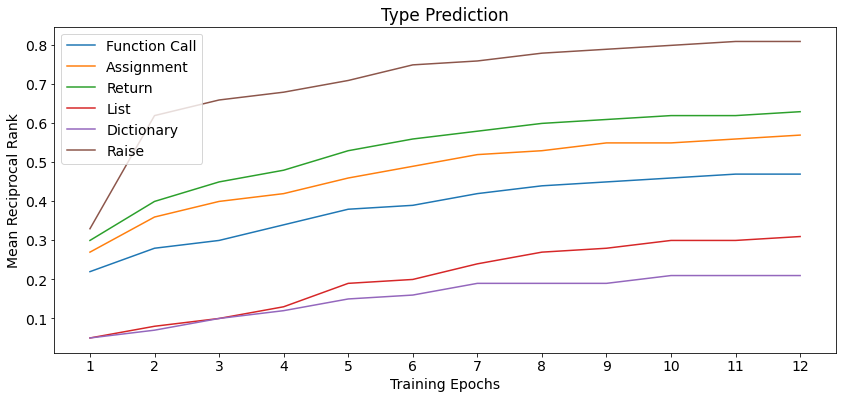

In [27]:
figure(figsize=(14,6))
plt.title("Type Prediction")
plt.xlabel("Training Epochs")
plt.ylabel("Mean Reciprocal Rank")
plt.xticks(list(range(1, 13)))
for key in type_scores:
    plt.plot(range(1, len(type_scores[key]["score"]) + 1), type_scores[key]["score"], label=type_scores[key]["label"])
plt.legend()
    